# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Set Unit counter to define metric of weather

units = "metric"


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | kotel'nikovo
Processing Record 9 of Set 1 | nishinoomote
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | howrah
Processing Record 14 of Set 1 | mwinilunga
Processing Record 15 of Set 1 | mahina
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | pimentel
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | porto novo
Processing Record 20 of Set 1 | taroa
Processing Record 21 of Set 1 | nar'yan-mar
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,0.11,81,100,1.41,CL,1723086660
1,edinburgh of the seven seas,-37.0676,-12.3116,9.19,53,100,10.87,SH,1723086661
2,san patricio,28.0170,-97.5169,30.50,62,0,5.48,US,1723086662
3,port-aux-francais,-49.3500,70.2167,0.59,96,100,11.08,TF,1723086663
4,yellowknife,62.4560,-114.3525,20.87,37,0,4.92,CA,1723086579


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,0.11,81,100,1.41,CL,1723086660
1,edinburgh of the seven seas,-37.0676,-12.3116,9.19,53,100,10.87,SH,1723086661
2,san patricio,28.0170,-97.5169,30.50,62,0,5.48,US,1723086662
3,port-aux-francais,-49.3500,70.2167,0.59,96,100,11.08,TF,1723086663
4,yellowknife,62.4560,-114.3525,20.87,37,0,4.92,CA,1723086579


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

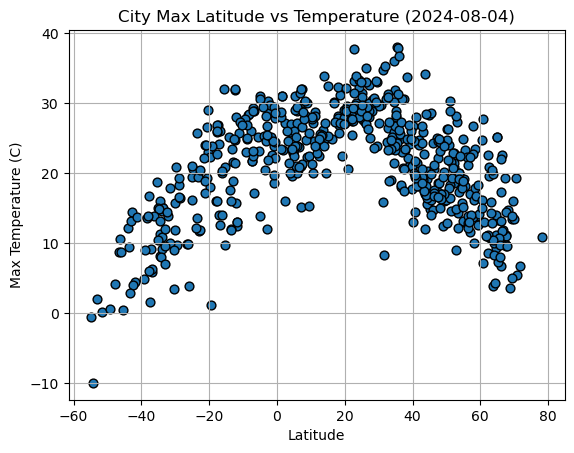

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", s=40, edgecolor = "k", grid=True)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2024-08-04)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
          

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

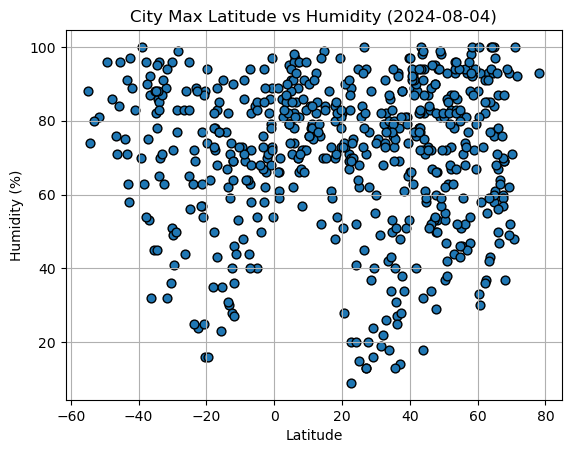

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", s=40, edgecolor = "k", grid=True)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Humidity (2024-08-04)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
          

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

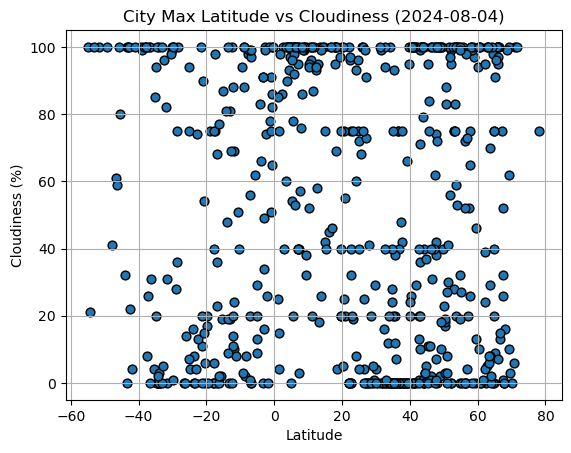

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", s=40, edgecolor = "k", grid=True)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Cloudiness (2024-08-04)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
          

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

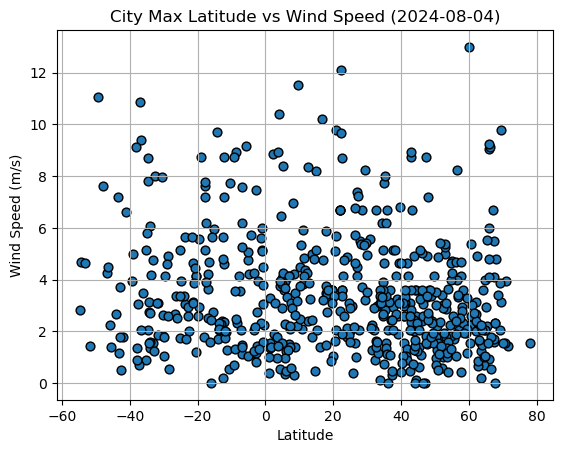

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", s=40, edgecolor = "k", grid=True)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Wind Speed (2024-08-04)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
          

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [171]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_value = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.plot(x_values, regress_value, "-r")
    plt.scatter(x_values, y_values)
   
      # Get current axis limits
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    
    # Define position for annotation within the plot range/ Took from Hunter Becker
    x_pos = x_min + 0.05 * (x_max - x_min)  # 5% from the left
    y_pos = y_max - 0.1 * (y_max - y_min)   # 10% from the top
    
    # Add annotation
    plt.annotate(line_eq, (x_pos, y_pos), fontsize=10, color="red", bbox=dict(facecolor='white', alpha=0.5))
    
    # plt.plot(x_values, regress_value, "-r")
    # plt.scatter(x_values, y_values)
  
    
    print("The r^2-value is: " + str(rvalue))
    

In [172]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,san patricio,28.0170,-97.5169,30.50,62,0,5.48,US,1723086662
4,yellowknife,62.4560,-114.3525,20.87,37,0,4.92,CA,1723086579
6,kotel'nikovo,47.6317,43.1461,22.12,60,74,3.33,RU,1723086668
7,nishinoomote,30.7333,131.0000,29.68,75,0,5.56,JP,1723086669
9,albany,42.6001,-73.9662,18.23,78,1,0.45,US,1723086466


In [173]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,0.11,81,100,1.41,CL,1723086660
1,edinburgh of the seven seas,-37.0676,-12.3116,9.19,53,100,10.87,SH,1723086661
3,port-aux-francais,-49.3500,70.2167,0.59,96,100,11.08,TF,1723086663
5,ancud,-41.8697,-73.8203,4.40,89,4,1.78,CL,1723086665
8,adamstown,-25.0660,-130.1015,19.47,65,94,1.75,PN,1723086670


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.6409437304166724


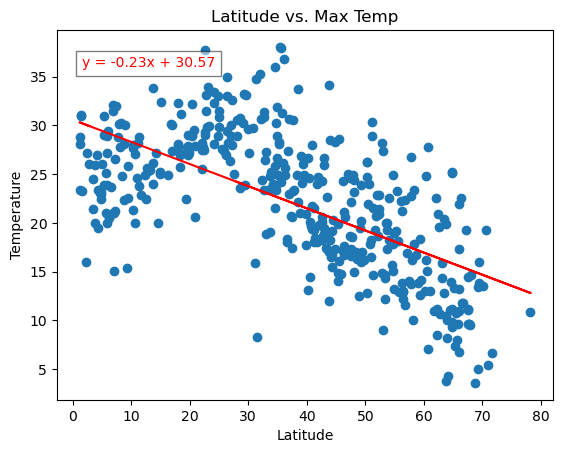

In [174]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])


plt.title("Latitude vs. Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()


The r^2-value is: 0.7740092308009616


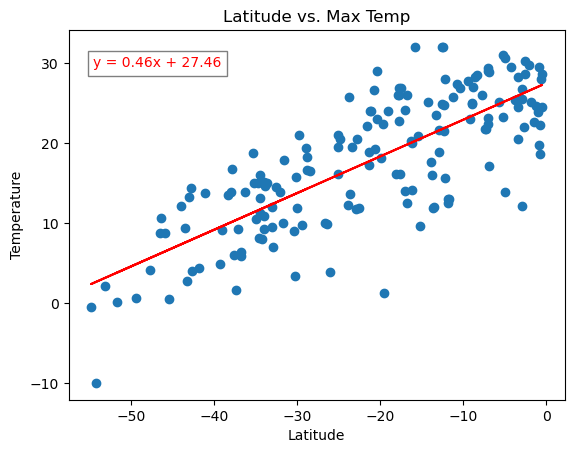

In [175]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])


plt.title("Latitude vs. Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

**Discussion about the linear relationship:**  There is a strong relationship in both the northern and southern hemispheres when it comes to max temperature compared to latitude.  The higher the latitude the hotter the temperature of the city.  The r^2 value for the southern hemisphere is .774 which is relatively close to 1, and the northern hemisphere r^2 value is -0.640. The southern hemisphere does have a stronger corrleation than the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: -0.05857174774718859


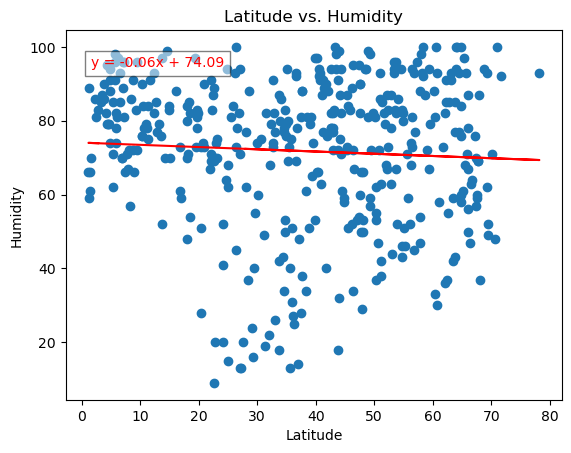

In [176]:
# Northern Hemisphere Latitude vs Humidity
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.title("Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r^2-value is: -0.18615146804743926


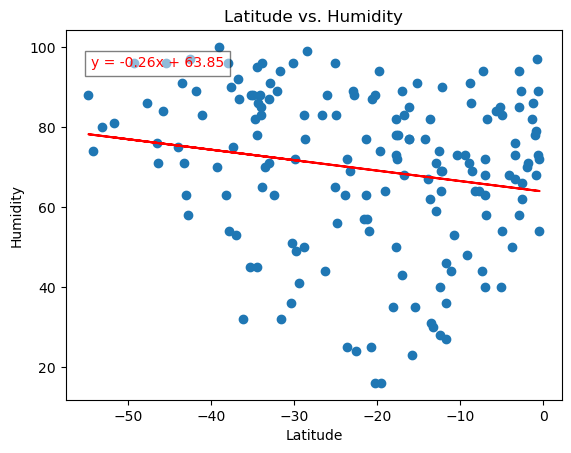

In [177]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.title("Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** There is little to no correlation between the latitude and humidity value. This is due to the r^2 value for the southern hemisphere being -0.186 which is incredibly close to 0.  While the r^2 value for the northern hemisphere is -0.058 also indicating a weak relationship between the humidity and the latitude.  

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.18148237097378614


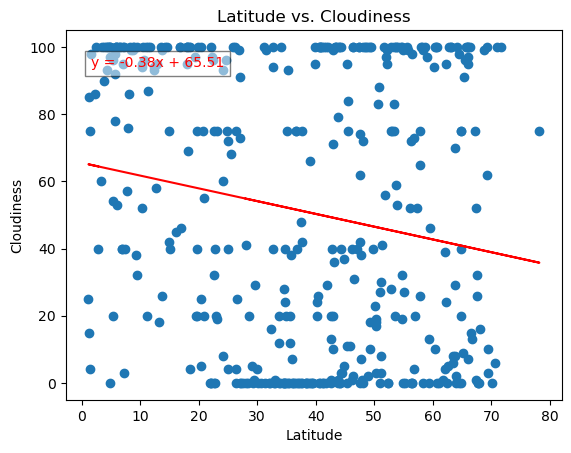

In [178]:
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.title("Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r^2-value is: -0.054312237107080226


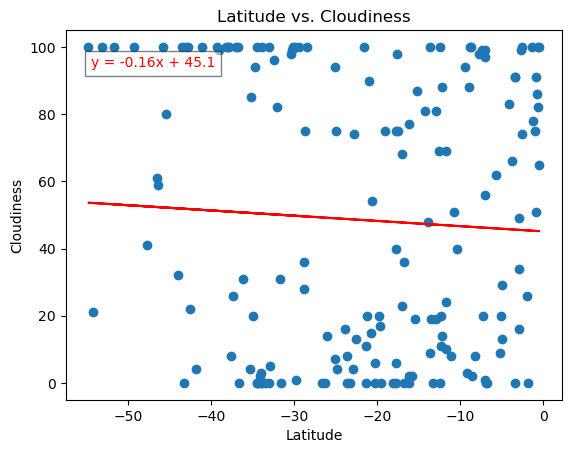

In [179]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.title("Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** There is weak correlation between latitude and cloudiness due to r^2 values being far away from 1.  The r^2 value for the northern hemisphere is -0.181 while the southern hemisphere -0.054.  These values indicate that latitude and cloudiness are very weakly correlated. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: -0.12867939725627744


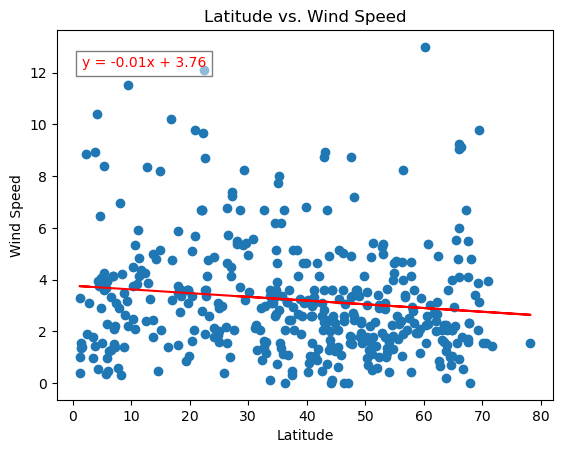

In [180]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

plt.title("Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r^2-value is: -0.050952959605771


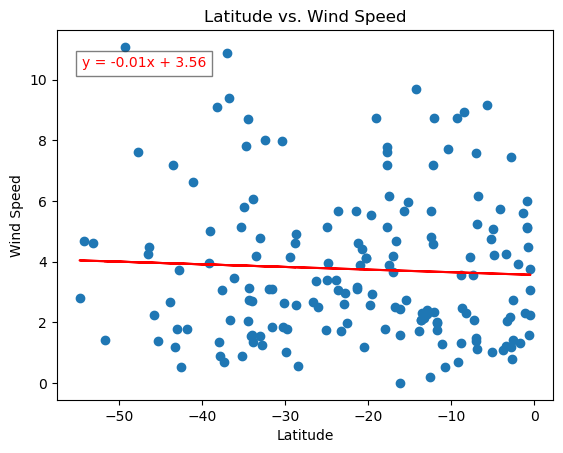

In [181]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

plt.title("Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** There is little to no correlation between the latitude and the windspeed in either the northern or southern hemispheres.  The northern hemisphere has a r^2 value of -0.128, and the southern hemisphere is -0.050  The southern hemisphere is slightly less correlated then the northern hemisphere. All together the wind speed and latitude are not very correlated with each other. 